## Import libraries

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from statistics import mean, stdev
import scipy.stats as stats



## Import data

In [2]:
df = pd.read_excel (r'./HR_ex.xlsx')
df

,Group,F1,F2,F3,Favg,Fdev,Fsem,M1,M2,M3,Mavg,Mdev,Msem
0,Resting_InClass,58,68,63,63.000000,5.000000,2.886751,64,74,68,68.666667,5.033223,2.905933
1,Resting_outside,66,64,68,66.000000,2.000000,1.154701,66,72,68,68.666667,3.055050,1.763834
2,0,72,112,90,91.333333,20.033306,11.566234,116,102,100,106.000000,8.717798,5.033223
3,1,68,52,72,64.000000,10.583005,6.110101,70,80,62,70.666667,9.018500,5.206833
4,2,56,56,50,54.000000,3.464102,2.000000,68,70,66,68.000000,2.000000,1.154701
5,3,58,64,61,61.000000,3.000000,1.732051,66,70,60,65.333333,5.033223,2.905933
6,4,48,66,60,58.000000,9.165151,5.291503,68,70,60,66.000000,5.291503,3.055050
7,5,50,66,64,60.000000,8.717798,5.033223,64,70,62,65.333333,4.163332,2.403701


## Set average resting HR

In [3]:
F_resting = 63
M_resting = 68.666667

## Plot the average data

Text(0.5, 1.0, 'Exercise Recovery Over Time')

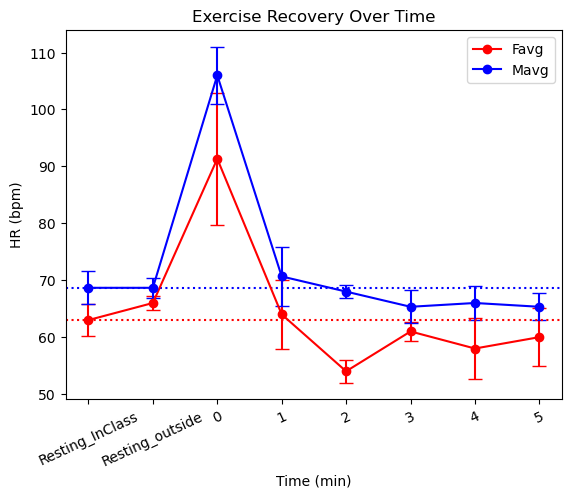

In [4]:
fig, ax = plt.subplots()
df.plot.line(ax = ax, x = 'Group', y = 'Favg',color = 'r', marker = 'o', yerr = 'Fsem', capsize=5)
df.plot.line(ax = ax, x = 'Group', y = 'Mavg',color = 'b', marker = 'o', yerr = 'Msem', capsize=5)
ax.set_xlabel("Time (min)")
ax.set_ylabel("HR (bpm)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
plt.axhline(F_resting, color='red', ls='dotted')
plt.axhline(M_resting, color='blue', ls='dotted')
plt.title('Exercise Recovery Over Time')

## Normalize the data by dividing it by the avg resting HR

In [5]:
df['N_Favg'] = df.Favg/63
df['N_Mavg'] = df.Mavg/68.666667
df['N_Fsem'] = sem(df.N_Favg)
df['N_Msem'] = sem(df.N_Mavg)

## Plot the normalized data

Text(0.5, 1.0, 'Normalized Graph of Exercise Recovery Over Time')

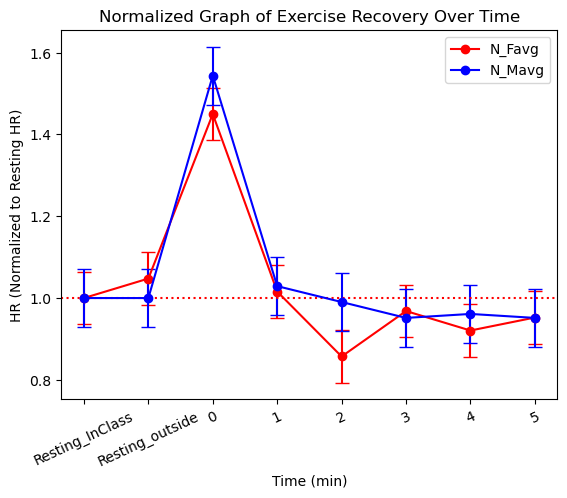

In [6]:
fig, ax = plt.subplots()
df.plot.line(ax = ax, x = 'Group', y = 'N_Favg',color = 'r', marker = 'o', yerr = 'N_Fsem', capsize=5)
df.plot.line(ax = ax, x = 'Group', y = 'N_Mavg',color = 'b', marker = 'o', yerr = 'N_Msem', capsize=5)
ax.set_xlabel("Time (min)")
ax.set_ylabel("HR (Normalized to Resting HR)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
plt.axhline(1, color='red', ls='dotted')
plt.title('Normalized Graph of Exercise Recovery Over Time')

## Determine time to reach resting after exercise for each individual

In [7]:
#View the data table again
df

,Group,F1,F2,F3,Favg,Fdev,Fsem,M1,M2,M3,Mavg,Mdev,Msem,N_Favg,N_Mavg,N_Fsem,N_Msem
0,Resting_InClass,58,68,63,63.000000,5.000000,2.886751,64,74,68,68.666667,5.033223,2.905933,1.000000,1.000000,0.063971,0.070704
1,Resting_outside,66,64,68,66.000000,2.000000,1.154701,66,72,68,68.666667,3.055050,1.763834,1.047619,1.000000,0.063971,0.070704
2,0,72,112,90,91.333333,20.033306,11.566234,116,102,100,106.000000,8.717798,5.033223,1.449735,1.543689,0.063971,0.070704
3,1,68,52,72,64.000000,10.583005,6.110101,70,80,62,70.666667,9.018500,5.206833,1.015873,1.029126,0.063971,0.070704
4,2,56,56,50,54.000000,3.464102,2.000000,68,70,66,68.000000,2.000000,1.154701,0.857143,0.990291,0.063971,0.070704
5,3,58,64,61,61.000000,3.000000,1.732051,66,70,60,65.333333,5.033223,2.905933,0.968254,0.951456,0.063971,0.070704
6,4,48,66,60,58.000000,9.165151,5.291503,68,70,60,66.000000,5.291503,3.055050,0.920635,0.961165,0.063971,0.070704
7,5,50,66,64,60.000000,8.717798,5.033223,64,70,62,65.333333,4.163332,2.403701,0.952381,0.951456,0.063971,0.070704


In [8]:
#Define the resting heartrate for each individual tested
F1_resting = 58
F2_resting = 68
F3_resting = 63
M1_resting = 64
M2_resting = 74
M3_resting = 68

## Print the values for each individual's time to return to resting after exercise (male and female)

In [12]:
# Exclude the first two rows and then check for the condition
reached_threshold_M1 = df['M1'].iloc[2:] <= M1_resting
time_at_threshold_M1 = df.loc[reached_threshold_M1.index[reached_threshold_M1], 'Group'].iloc[0] if reached_threshold_M1.any() else None
reached_threshold_M2 = df['M2'].iloc[2:] <= M2_resting
time_at_threshold_M2 = df.loc[reached_threshold_M2.index[reached_threshold_M2], 'Group'].iloc[0] if reached_threshold_M2.any() else None
reached_threshold_M3 = df['M3'].iloc[2:] <= M3_resting
time_at_threshold_M3 = df.loc[reached_threshold_M3.index[reached_threshold_M3], 'Group'].iloc[0] if reached_threshold_M3.any() else None

reached_threshold_F1 = df['F1'].iloc[2:] <= F1_resting
time_at_threshold_F1 = df.loc[reached_threshold_F1.index[reached_threshold_F1], 'Group'].iloc[0] if reached_threshold_F1.any() else None
reached_threshold_F2 = df['F2'].iloc[2:] <= F2_resting
time_at_threshold_F2 = df.loc[reached_threshold_F2.index[reached_threshold_F2], 'Group'].iloc[0] if reached_threshold_F2.any() else None
reached_threshold_F3 = df['F3'].iloc[2:] <= F3_resting
time_at_threshold_F3 = df.loc[reached_threshold_F3.index[reached_threshold_F3], 'Group'].iloc[0] if reached_threshold_F3.any() else None

print(f"Time to reach ~resting HR (set to: {M1_resting}) for the male 1 was: {time_at_threshold_M1} minutes")
print(f"Time to reach ~resting HR (set to: {M2_resting}) for the male 2 was: {time_at_threshold_M2} minutes")
print(f"Time to reach ~resting HR (set to: {M3_resting}) for the male 3 was: {time_at_threshold_M3} minutes")
print(f"Time to reach ~resting HR (set to: {F1_resting}) for the female 1 was: {time_at_threshold_F1} minutes")
print(f"Time to reach ~resting HR (set to: {F2_resting}) for the female 2 was: {time_at_threshold_F2} minutes")
print(f"Time to reach ~resting HR (set to: {F3_resting}) for the female 3 was: {time_at_threshold_F3} minutes")

Time to reach ~resting HR (set to: 64) for the male 1 was: 5 minutes
Time to reach ~resting HR (set to: 74) for the male 2 was: 2 minutes
Time to reach ~resting HR (set to: 68) for the male 3 was: 1 minutes
Time to reach ~resting HR (set to: 58) for the female 1 was: 2 minutes
Time to reach ~resting HR (set to: 68) for the female 2 was: 1 minutes
Time to reach ~resting HR (set to: 63) for the female 3 was: 2 minutes


## Calculate the mean and standard error of mean (SEM) for these values

In [13]:
# Create lists for male and female threshold times
M_values = [time_at_threshold_M1, time_at_threshold_M2, time_at_threshold_M3]
F_values = [time_at_threshold_F1, time_at_threshold_F2, time_at_threshold_F3]

# Calculate mean and standard deviation for males
M_mean = np.mean(M_values)
M_sem = np.std(M_values)

# Calculate mean and standard deviation for females
F_mean = np.mean(F_values)
F_sem = np.std(F_values)

## Plot the graph 

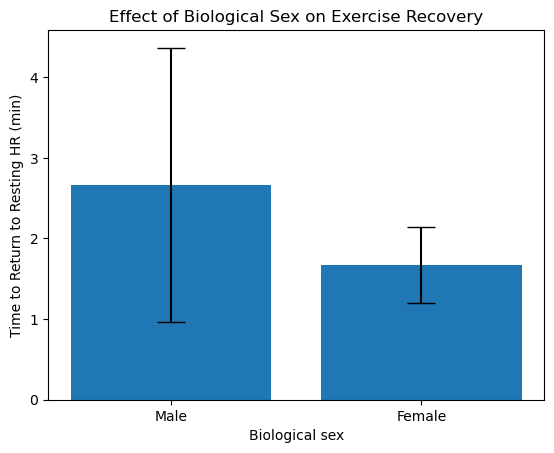

In [14]:
# build a bar plot
plt.bar(['Male', 'Female'],[M_mean, F_mean], yerr=[M_sem, F_sem], capsize=10)
plt.xlabel('Biological sex')
plt.ylabel('Time to Return to Resting HR (min)')
plt.title('Effect of Biological Sex on Exercise Recovery')
plt.show()

## Perform a t test to determine significance (note: pvalue of less than 0.05 is considered significant)

In [15]:
#vis1 and aud1 refer to your columns that you are comparing (that you defined above)

res = stats.ttest_ind(M_values, F_values, 
                      equal_var=True)

display(res)

Ttest_indResult(statistic=0.8017837257372731, pvalue=0.46760475460939743)